In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import os

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
from datetime import datetime, timedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

#to print the whole column
#for column in columns:
    #print(column["name"], column["type"],column)
print ("------------------")
most_recent_date= session.query(func.max(measurement.date)).scalar()
print (f'The most recent date in this data set is {most_recent_date}')



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
------------------
The most recent date in this data set is 2017-08-23


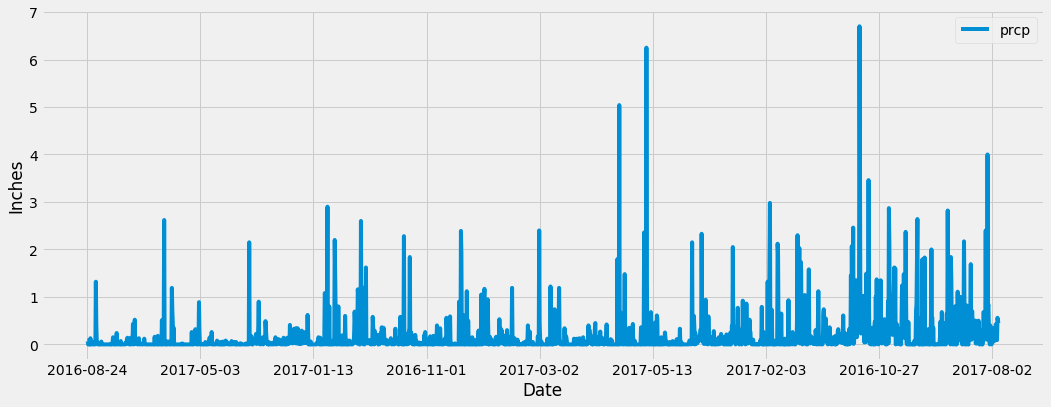

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(measurement.date)).scalar()

#to make it into a date type
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
year_ago= most_recent_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_year_ago = session.query(measurement.date, measurement.prcp).filter(measurement.date > year_ago).all()
precipitation_year_ago

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_year_ago_df = pd.DataFrame(precipitation_year_ago, columns=['date','prcp']).dropna()
precipitation_year_ago_df

# Sort the dataframe by date
precipitation_year_ago_df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
xlabel = ('date')
ylabel = ('prcp')
precipitation_year_ago_df.plot(xlabel, ylabel, figsize=(16,6))
plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_year_ago_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
number_of_stations= session.query(measurement).group_by(measurement.station).count()
print (f'The total number of stations in the dataset is {number_of_stations}')

The total number of stations in the dataset is 9


In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.sum(measurement.station).desc()).all()


[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
average_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()

print(f'From the most active station "USC00519281", the average temperature is {average_temp:.2f}, the lowest temperature registered is {min_temp:.1f} and the highest temperature is {max_temp:.1f}')


From the most active station "USC00519281", the average temperature is 71.66, the lowest temperature registered is 54.0 and the highest temperature is 85.0


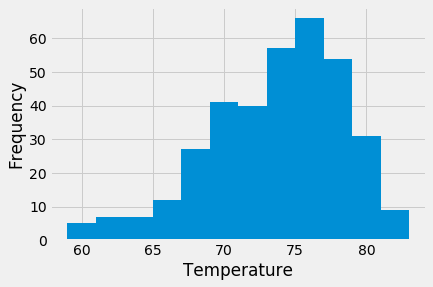

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_data = session.query(func.max(measurement.date)).filter(measurement.station == 'USC00519281').scalar()

#to make it into a date type
USC00519281_data = datetime.strptime(USC00519281_data, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
USC00519281_last12mo= USC00519281_data - timedelta(days=365)
USC00519281_last12mo

# To get the temperature data
USC00519281_temp = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date > USC00519281_last12mo).all()
USC00519281_temp

USC00519281_temp_df = pd.DataFrame(USC00519281_temp, columns = ['tobs'])
# Plot the histogram
plt.hist(USC00519281_temp_df['tobs'], bins= 12, alpha= 1)

# Add labels and title
plt.xlabel ('Temperature')
plt.ylabel ('Frequency')

# Show the plot
plt.show()

# Close session

In [49]:
# Close Session
session.close()